In [941]:
from qiskit import *

In [942]:
from qiskit.tools.visualization import plot_histogram

In [943]:
from qiskit.tools.monitor import job_monitor

In [944]:
%matplotlib inline

In [945]:
name = input("Enter Your Name:")

Enter Your Name:


In [946]:
if name =="":
    name = "Marie Curie"

In [947]:
# create binary version of name

In [948]:
ascii_name = bytes(name, "ascii")
ascii_name = ' '.join(["{0:b}".format(x) for x in ascii_name])
print(type(ascii_name), ascii_name)

<class 'str'> 1001101 1100001 1110010 1101001 1100101 100000 1000011 1110101 1110010 1101001 1100101


In [949]:
# split the binary version of the name into a list, and take the first letter for processing

In [950]:
secret_number = ascii_name.split(" ")[0]

In [951]:
# This is the binary version of the first letter of the name.

In [952]:
print("Your name has been encoded to: {}".format(secret_number))

Your name has been encoded to: 1001101


In [953]:
# STARTING QUANTUM CIRCUIT CREATION

In [954]:
my_quantum_circuit_quantity = len(secret_number)

In [955]:
circuit = QuantumCircuit(my_quantum_circuit_quantity+1,my_quantum_circuit_quantity)
print("Created {} quantum output circuits and 1 quantum input circuit.".format(my_quantum_circuit_quantity))

Created 7 quantum output circuits and 1 quantum input circuit.


In [956]:
for i in range(my_quantum_circuit_quantity):
    circuit.h(i)

In [957]:
# add x gate to input qbit
circuit.x(7)

In [958]:
# add hadamard gate to input qbit
circuit.h(7)

In [959]:
# adding barrier for visual clarity
circuit.barrier()

In [960]:
# if first number is a 1 then put an Cnot gate on the line.
print("Secret Number is {} \n".format(secret_number))

Secret Number is 1001101 



In [961]:
for i in range( len(secret_number)):
    my_qubit= len(secret_number)-i-1
    if secret_number[i] == "1":
        print("Adding Cnot Gate to Qubit {}".format(my_qubit))
        circuit.cx(my_qubit,7)
    else :
        print("No Cnot gate for you Qubit {}".format(my_qubit))

Adding Cnot Gate to Qubit 6
No Cnot gate for you Qubit 5
No Cnot gate for you Qubit 4
Adding Cnot Gate to Qubit 3
Adding Cnot Gate to Qubit 2
No Cnot gate for you Qubit 1
Adding Cnot Gate to Qubit 0


In [962]:
# adding barrier for clarity
circuit.barrier()

In [963]:
# adding 2nd set of Hadamard gates
for i in range(my_quantum_circuit_quantity):
    circuit.h(i)
#circuit.h([0,1,2,3,4,5,6])

In [964]:
# adding barrier for clarity
circuit.barrier()

In [965]:
# Measure the Output Qubits.  Notice the input qbit is not measured.
circuit.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])

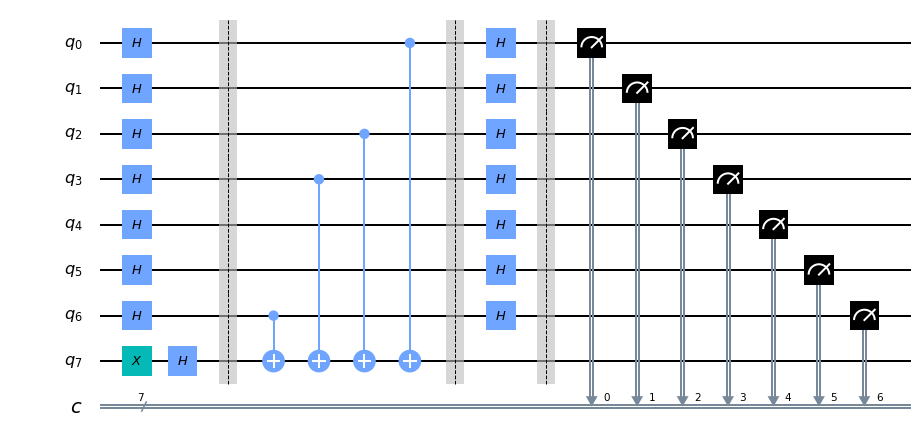

In [966]:
circuit.draw(output='mpl')

In [967]:
# Preparing to send job to Quantum Computer

In [968]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-06-29 13:03:20,563: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [969]:
provider = IBMQ.get_provider('ibm-q')

In [970]:
#London is 5 qbits  - 8192 shots maximum.

In [971]:
#group = provider.get_backend('ibmq_london')

In [972]:
#Melbourne is 15 qbits  - 8192 shots maximum.

In [973]:
group = provider.get_backend('ibmq_16_melbourne')

In [974]:
simulator = Aer.get_backend('qasm_simulator')

In [975]:
job = execute(circuit, backend = simulator, shots = 1024)

In [976]:
# uncomment this line to run on real quantum computer
# job = execute(circuit, backend = group, shots = 1024)

In [977]:
# show job monitor
job_monitor(job)

Job Status: job has successfully run


In [978]:
result = job.result()

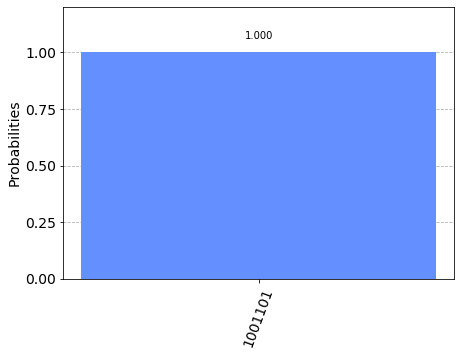

In [979]:
plot_histogram(result.get_counts(circuit))

In [980]:
counts = result.get_counts()

In [981]:
# get the answer that occurred with the most probability
import operator
answer = max(counts.items(), key=operator.itemgetter(1))[0]

In [982]:
print("Your qauntumly revealed secret number is {} which should equal {}".format(answer,secret_number))
if answer == secret_number:
    print("We did it!")
else:
    print("Bad Robot. Try again.")

Your qauntumly revealed secret number is 1001101 which should equal 1001101
We did it!
